<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/Predicting-income-of-employees/blob/main/FINAL_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ***IMPORTING THE DATASET***

In [ ]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Send a GET request to the URL
response = requests.get(url)

with open("adult.data", "wb") as f:
    f.write(response.content)


# Loading the dataset into a pandas df with the column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv("adult.data",names=column_names)
df2 = df #for later use , to get the imcome(Target variable) to Y


# ***VISUALISING THE DATA***

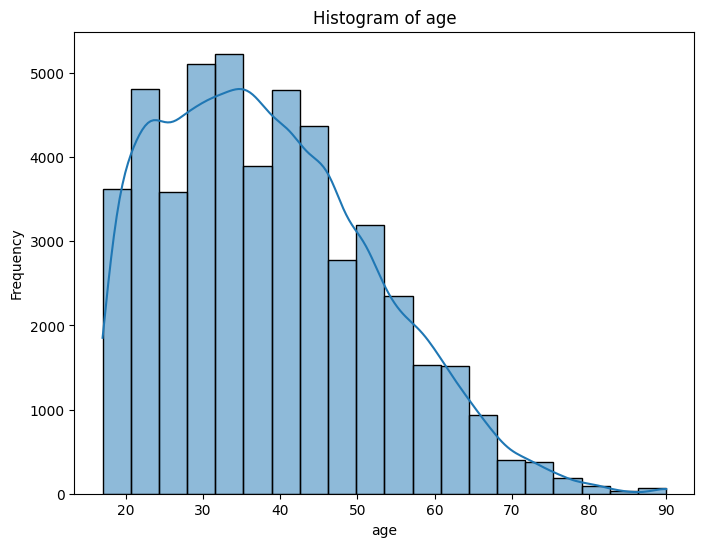

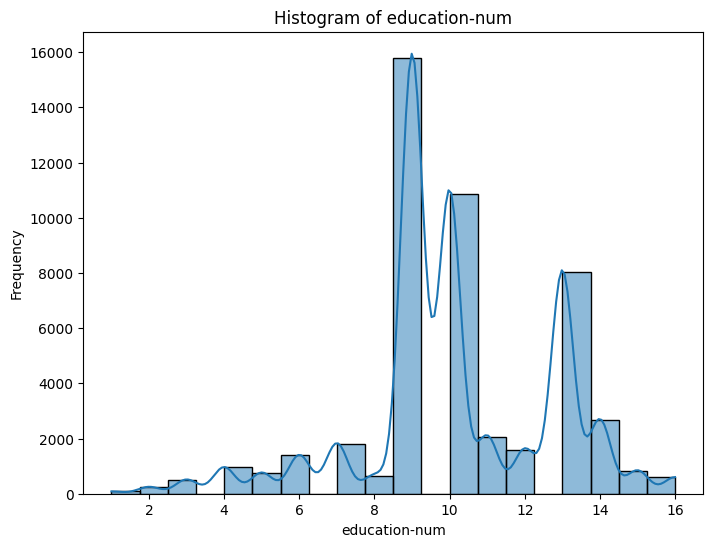

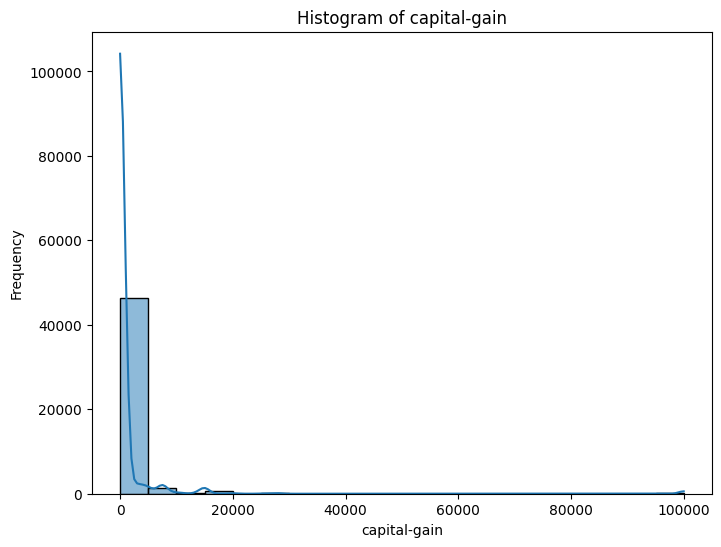

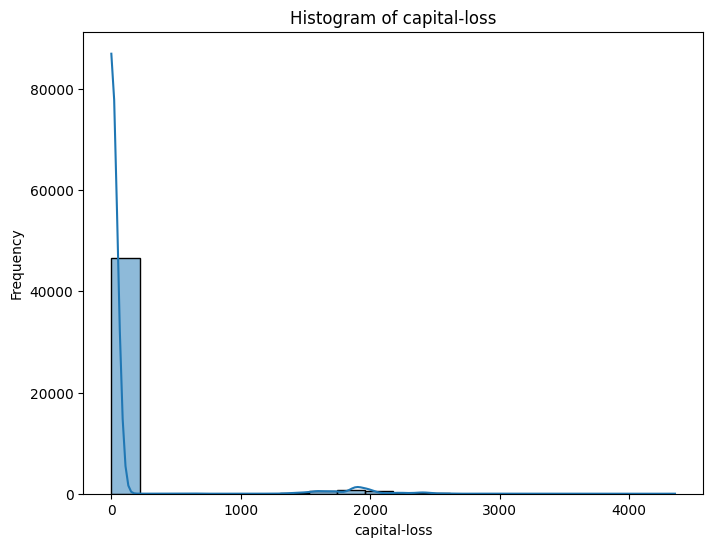

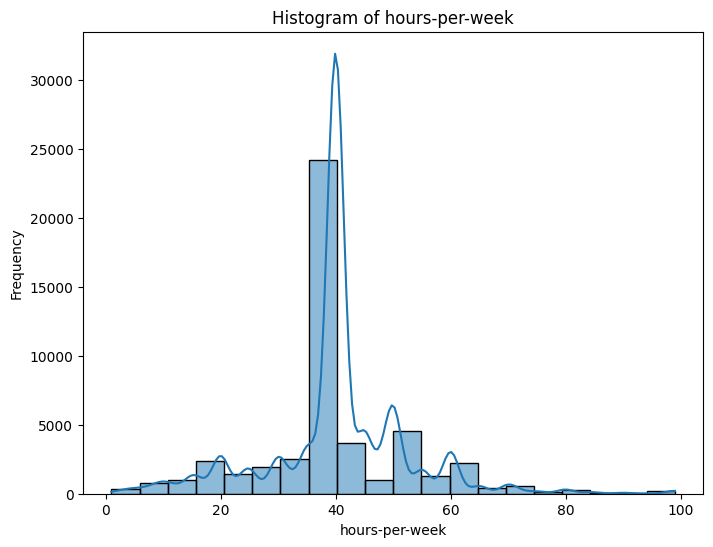

In [ ]:
# Histograms for numerical features
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

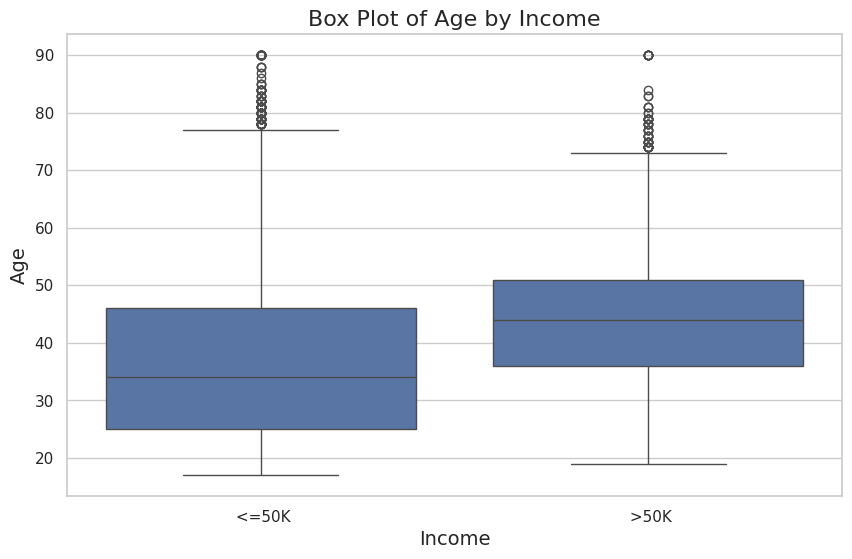

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# style of the seaborn plots
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)

# the labels and title
plt.xlabel('Income', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Box Plot of Age by Income', fontsize=16)

plt.show()

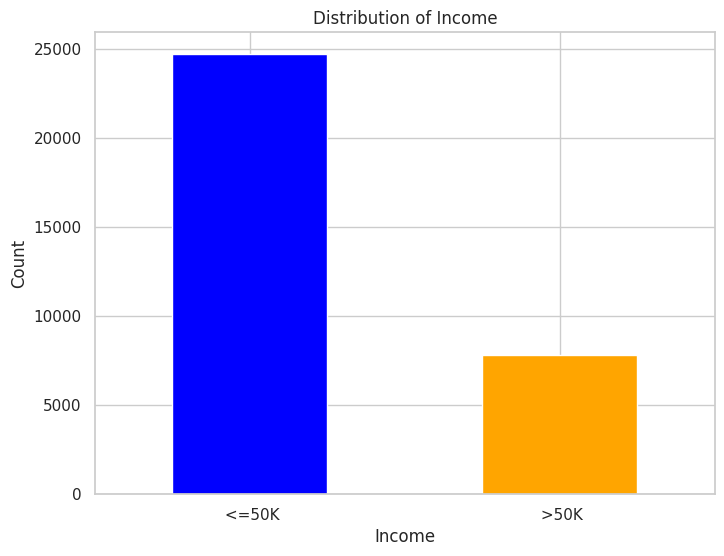

In [ ]:
# Plotting a box plot for the 'income' column
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-6-67cfef3e838b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


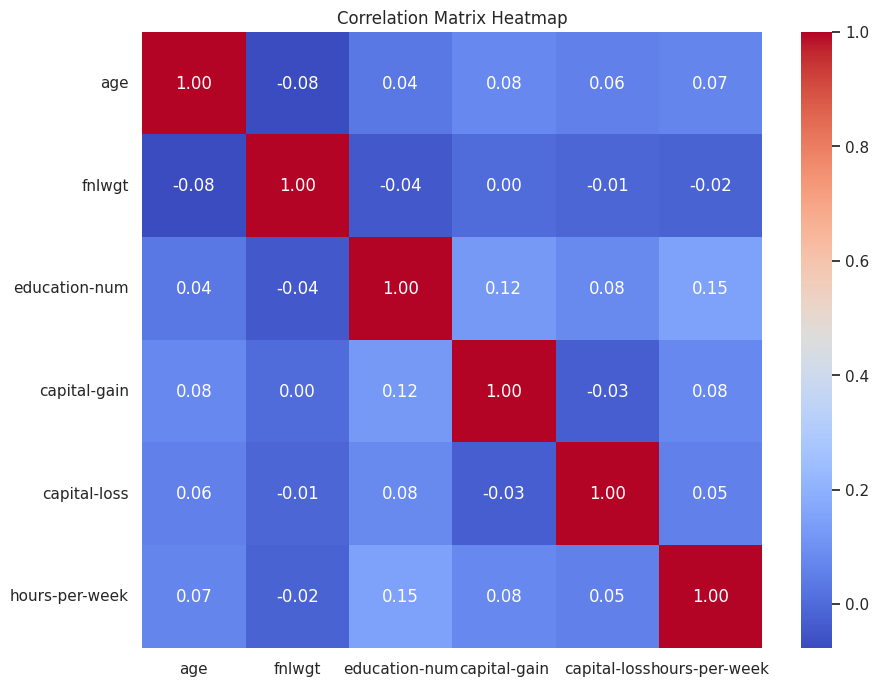

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

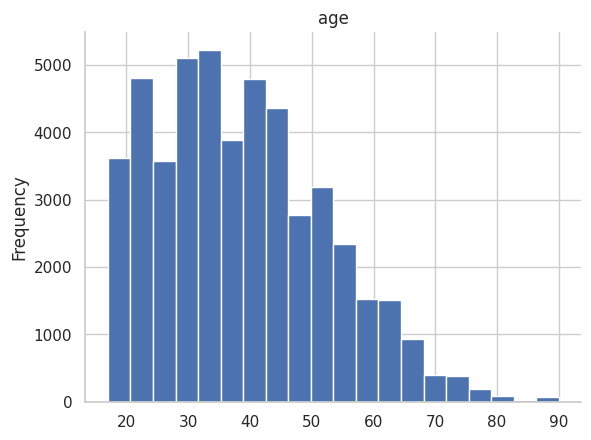

In [ ]:

df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='age', ylabel='Count'>

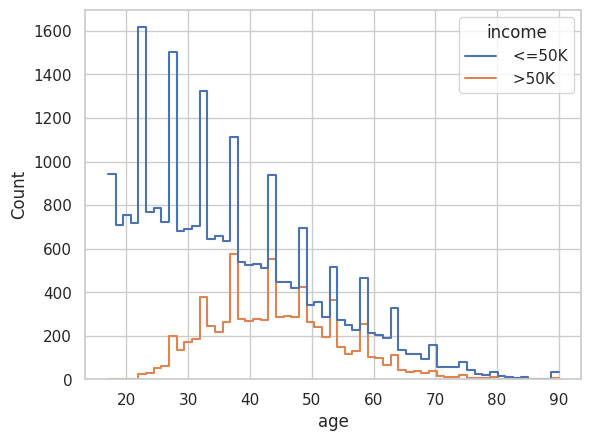

In [ ]:
sns.histplot(data=df, x="age", hue="income", element="step", fill=False)

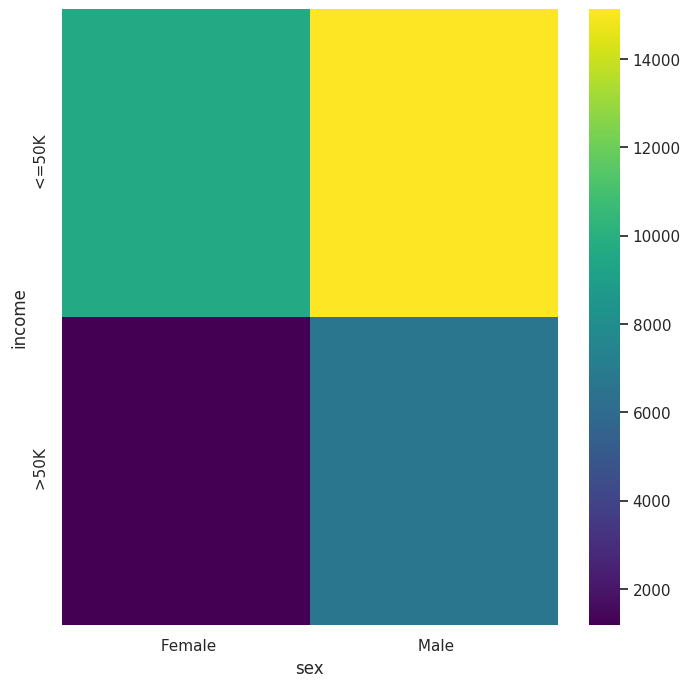

In [ ]:
#heat map to showing the distribution of males and females for <50k and >50k
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['income'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('income')

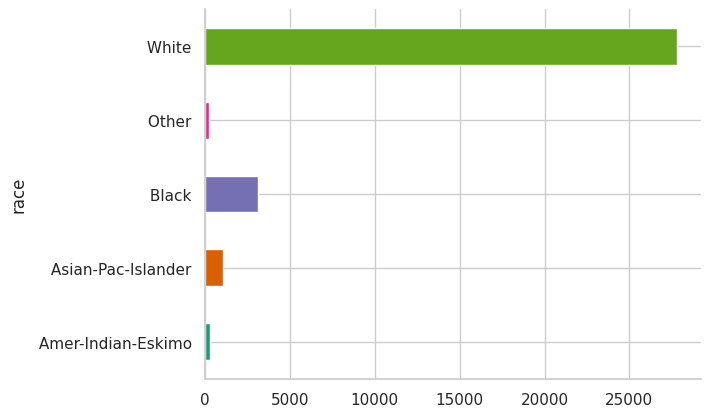

In [ ]:
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

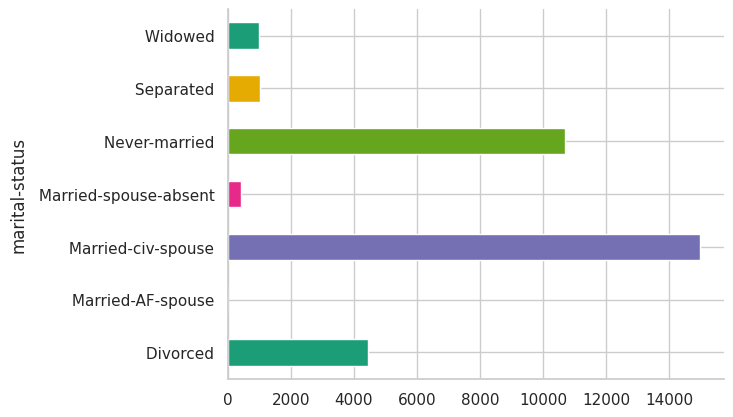

In [ ]:
df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

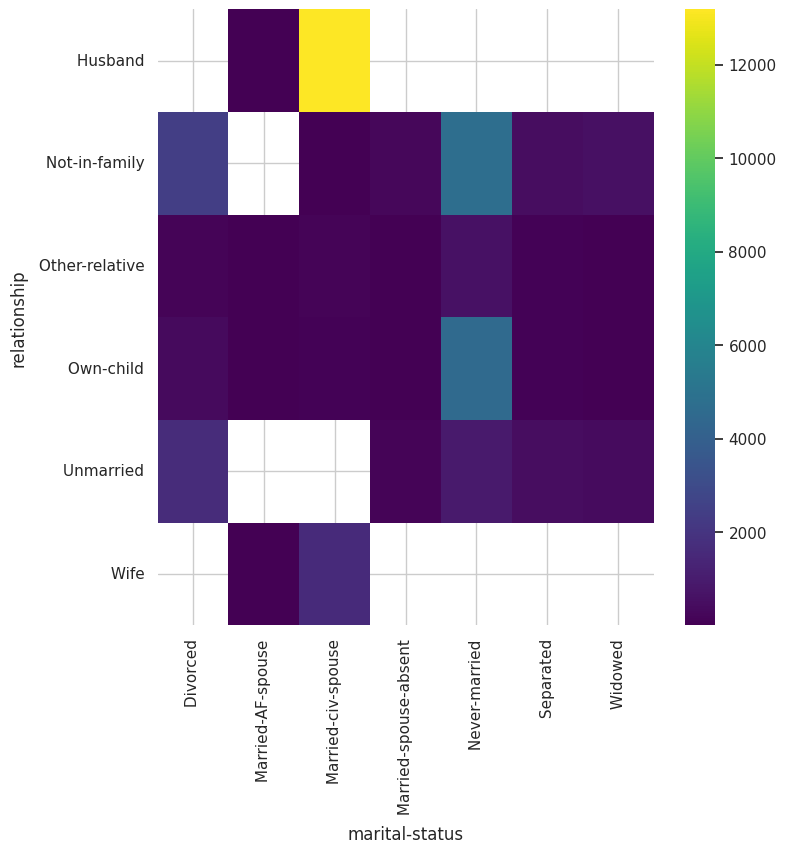

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in df.groupby('marital-status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital-status')
_ = plt.ylabel('relationship')

# ***DATA PREPROCESSING***

In [ ]:
df.types

NameError: name 'df' is not defined

# ***replacing the "?"***

In [ ]:
# Iterating over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique

In [ ]:
# Replacing "?" values with the mode of each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].replace(" ?", mode_value, inplace=True)

In [ ]:
# Iterating over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique valu

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Removing null values**

In [ ]:
null_count = np.sum(df.isnull(), axis = 0)
print(null_count)

age                   0
workclass           963
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation          966
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      274
None              48842
dtype: int64


In [ ]:
workclass_mode = (df['workclass'].mode()).iloc[0]
occupation_mode = df['occupation'].mode().iloc[0]
nativecountry_mode = df['native-country'].mode().iloc[0]

In [ ]:
df['workclass'].fillna(value=workclass_mode, inplace=True)
df['occupation'].fillna(value=occupation_mode, inplace=True)
df['native-country'].fillna(value=nativecountry_mode, inplace=True)

In [ ]:
null_count = np.sum(df.isnull(), axis = 0)
print(null_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]
# Print the duplicates
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th         

In [ ]:
from scipy import stats

# Calculating the Z-scores for numerical columns
z_scores = stats.zscore(df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

threshold = 3

# Filter rows where the Z-scores exceed the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Remove outliers from the DataFrame
df = df[(z_scores <= threshold).all(axis=1)]

In [ ]:
# Print the column names of the DataFrame
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
summary = df.describe()

print(summary)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# **One Hot Encoding**

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
#selecting the columns with object type
to_encode = df.select_dtypes(include=['object']).columns
to_encode #the ones to encode

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
df[to_encode].nunique() #checking how many unique values each column has

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

In [ ]:
#Workclass
top_10_WC = df['workclass'].value_counts()[:10].sort_values(ascending=False).index
top_10_WC

#occupation
top_10_O = df['occupation'].value_counts()[:10].sort_values(ascending=False).index
top_10_O

#native-country
top_10_NC = df['native-country'].value_counts()[:10].sort_values(ascending=False).index
top_10_NC

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England'],
      dtype='object')

In [ ]:
# Encode sex
top_2_sex = df['sex'].value_counts()[:2].sort_values(ascending=False).index
for val in top_2_sex:
    df["Sex_" + val] = np.where((df['sex'] == val), 1, 0)

# Encode relationship column
top_relationships = df['relationship'].value_counts().index
for val in top_relationships:
    df["Relationship_" + val] = np.where((df['relationship'] == val), 1, 0)

In [ ]:
#Workclass
for val in top_10_WC :
    df["Workclass"+"_"+ val] = np.where((df['workclass'] == val), 1, 0)


#occupation
for val in top_10_O :
    df["Occupation"+"_"+ val] = np.where((df['occupation'] == val), 1, 0)


#native-country
for val in top_10_NC :
    df["NativeCountry"+"_"+ val] = np.where((df['native-country'] == val), 1, 0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,NativeCountry_ United-States,NativeCountry_ Mexico,NativeCountry_ Philippines,NativeCountry_ Germany,NativeCountry_ Canada,NativeCountry_ Puerto-Rico,NativeCountry_ El-Salvador,NativeCountry_ India,NativeCountry_ Cuba,NativeCountry_ England
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,0,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,1,0,0,0,0,0,0,0,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,1,0,0,0,0,0,0,0,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
drop_col = ['fnlwgt'] #dropping this column as it is no purpose

In [ ]:
df = df.drop(columns=drop_col, axis=1)

In [ ]:
to_drop = ['workclass', 'education', 'occupation', 'native-country','sex','relationship'] #the ones that was encoded
df = df.drop(columns = to_drop, axis=1)#dropping those that were encoded
to_encode = to_encode.drop(to_drop) #removing the ones that got encoded from the object type list

In [ ]:
for name in to_encode:
    temp_df = pd.get_dummies(df[name])
    df.join(temp_df)

In [ ]:
print(to_encode)

Index(['marital-status', 'race', 'income'], dtype='object')


In [ ]:
df = df.drop(columns = to_encode, axis=1)

In [ ]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Sex_ Male', 'Sex_ Female', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ German

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
None              float64
dtype: object

# ***Converting >= and <= 50k into true and false***

In [ ]:
# Replacing values in the 'income' column with boolean values
df2['income'] = df2['income'].str.strip().replace({'<=50K': False, '>50K': True})

# Checking the first few values in the 'income' column
print(df2['income'].head())

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool


In [ ]:
df2
df2['income'].head()

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool

In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Sex_ Male', 'Sex_ Female', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'Nativ

# ***Correlation of features with income***

In [ ]:

correlation_matrix = df2.corr()

# Extracting the correlation of each feature with income
income_correlation = correlation_matrix['income'].drop('income')

# Sort  descending order
income_correlation_sorted = income_correlation.abs().sort_values(ascending=False)

print("Correlation with income:")
print(income_correlation_sorted)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# ***Implementation of the model***

In [ ]:
# Extracting the target variable (y)
#y contains the target variable ('income') and X contains all other columns as features
y = df2['income']

X = df

In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Sex_ Male', 'Sex_ Female', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'Nativ

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=7)

X = df.select_dtypes(include=['int64'])

selector.fit(X, df2['income'])

# Get indices of the selected features
indices_selected = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[indices_selected]

print("The Best features are:")
print(selected_features)

Best features:
Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'Relationship_ Husband', 'Relationship_ Own-child'],
      dtype='object')


In [ ]:
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [ ]:
grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
           }

In [ ]:

rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

Running Grid Search...
Done


In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 200}
Best score is: 0.8616619226065474


200

In [ ]:
rf_accuracy = model_grid.predict(X_test)
# You can also print classification reports for more detailed evaluation
print("random forest Model Classification Report:")
print(classification_report(y_test, rf_accuracy))

random forest Model Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91      7469
        True       0.78      0.53      0.63      2300

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Sex_ Male', 'Sex_ Female', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Education_ HS-grad',
       'Education_ Some-college', 'Education_ Bachelors', 'Education_ Masters',
       'Education_ Assoc-voc', 'Education_ 11th', 'Education_ Assoc-acdm',
       'Education_ 10th', 'Education_ 7th-8th', 'Education_ Prof-school',
       'Occupation_ Prof-specialty', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Adm-clerical',
       'Occupation_ Sales', 'Occupation_ Other-service',
       'Occupation_ Machi

In [ ]:
# Compute the correlation matrix
correlation_matrix = df2.corr()

# Extract the correlation of each feature with the target variable (income)
income_correlation = correlation_matrix['income'].drop('income')

# Sort the correlation values in descending order
income_correlation_sorted = income_correlation.abs().sort_values(ascending=False)

# Print the correlation values
print("Correlation with income:")
print(income_correlation_sorted)

<ipython-input-164-a5c421ea2caf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


Correlation with income:
Relationship_ Husband            0.401035
education-num                    0.335154
age                              0.234037
hours-per-week                   0.229689
Relationship_ Own-child          0.228532
capital-gain                     0.223329
Sex_ Male                        0.215980
Sex_ Female                      0.215980
Occupation_ Exec-managerial      0.214861
Relationship_ Not-in-family      0.188497
Education_ Bachelors             0.180485
Education_ Masters               0.174570
Occupation_ Other-service        0.156348
Education_ Prof-school           0.154907
capital-loss                     0.150526
Relationship_ Unmarried          0.142857
Workclass_ Self-emp-inc          0.139467
Education_ HS-grad               0.131189
Workclass_ Private               0.125573
Relationship_ Wife               0.123264
Occupation_ Prof-specialty       0.112993
Occupation_ Adm-clerical         0.089986
Occupation_ Handlers-cleaners    0.087265
Education

<ipython-input-205-433bf94ad640>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


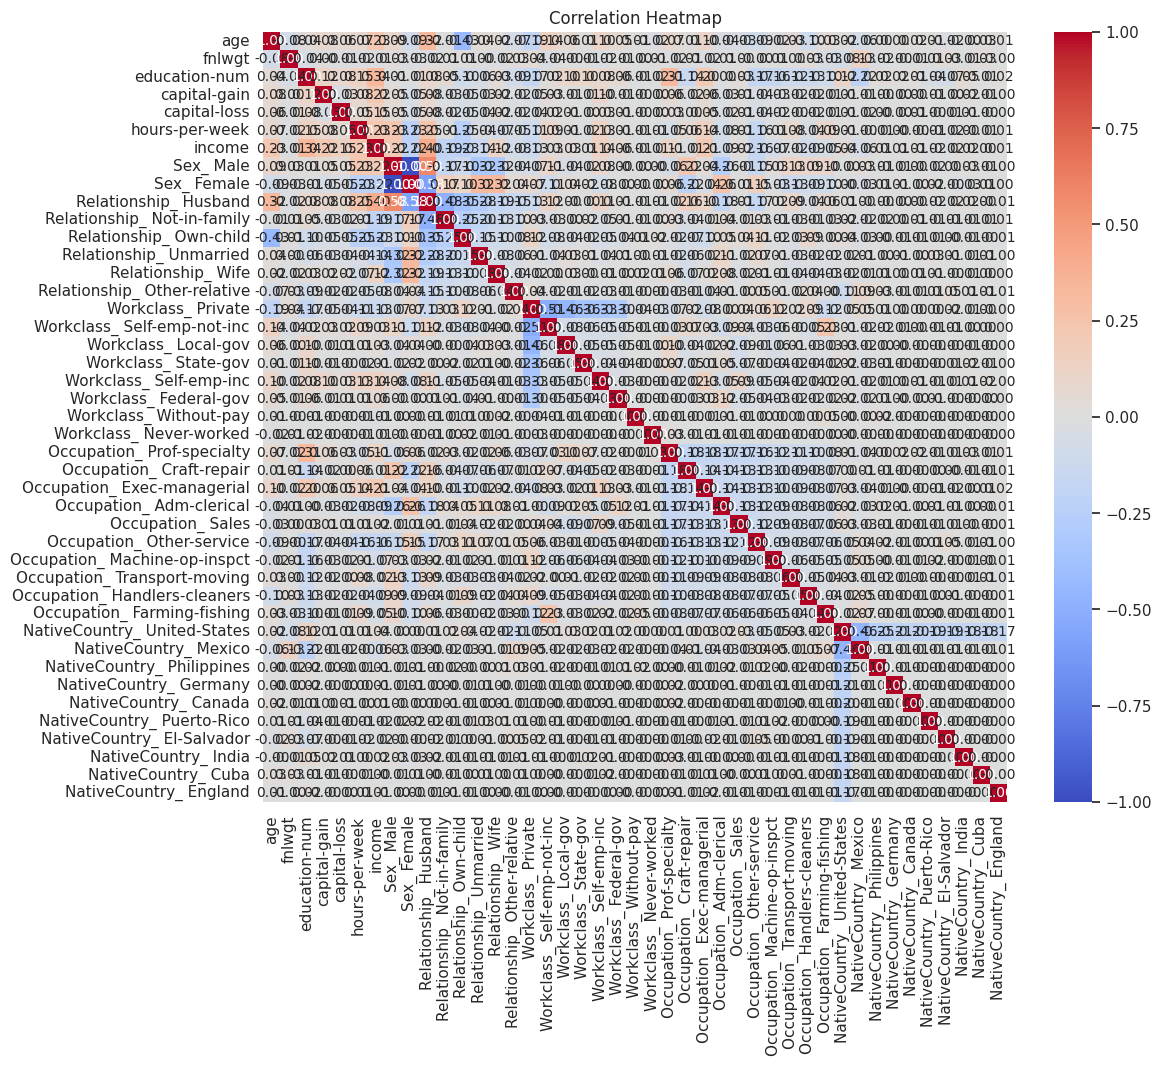

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE technique
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)

In [ ]:
model_grid_imbalanced = grid.fit(X_train1,y_train1)

In [ ]:
print('Best hyperparameters are: '+str(model_grid_imbalanced.best_params_))
print('Best score is: '+str(model_grid_imbalanced.best_score_))
best_max_depth_rf = model_grid_imbalanced.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid_imbalanced.best_estimator_.n_estimators
best_estimators_rf

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 200}
Best score is: 0.8594833564493758


200

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
rf_accuracy2 = model_grid_imbalanced.predict(X_test1)
# You can also print classification reports for more detailed evaluation
print("random forest Model Classification Report:")
print(classification_report(y_test1, rf_accuracy2))

random forest Model Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.80      0.85      7292
        True       0.83      0.92      0.87      7540

    accuracy                           0.86     14832
   macro avg       0.87      0.86      0.86     14832
weighted avg       0.87      0.86      0.86     14832



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object for normalization
min_max_scaler = MinMaxScaler()

# Create a StandardScaler object for standardization
standard_scaler = StandardScaler()

# Normalization (MinMaxScaler)
X_normalized = min_max_scaler.fit_transform(X_train1)

# Standardization (StandardScaler)
X_standardized = standard_scaler.fit_transform(X_train1)

In [ ]:
model_grid_scaling = grid.fit(X_standardized,y_train1)

print('Best hyperparameters are: '+str(model_grid_scaling.best_params_))
print('Best score is: '+str(model_grid_scaling.best_score_))

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 200}
Best score is: 0.8606102635228848


200

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
rf_accuracy3 = model_grid_scaling.predict(X_test1)
# You can also print classification reports for more detailed evaluation
print("random forest Model Classification Report:")
print(classification_report(y_test1, rf_accuracy3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


random forest Model Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7292
        True       0.51      1.00      0.67      7540

    accuracy                           0.51     14832
   macro avg       0.25      0.50      0.34     14832
weighted avg       0.26      0.51      0.34     14832



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
# 1. Instantiate the machine learning models
naive_bayes_model = GaussianNB()


# 2. Train the machine learning models
naive_bayes_model.fit(X_train, y_train)

# 3. Predict on the testing set
naive_bayes_pred = naive_bayes_model.predict(X_test)

# 4. Evaluate the performance of the models
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

print("Naive Bayes Model Accuracy:", naive_bayes_accuracy)

print("Naive Bayes Model Classification Report:")
print(classification_report(y_test, naive_bayes_pred))

Naive Bayes Model Accuracy: 0.8223973794656567
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.89      0.88      7469
        True       0.63      0.61      0.62      2300

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
# 1. Instantiate the machine learning models
naive_bayes_model = GaussianNB()


# 2. Train the machine learning models
naive_bayes_model.fit(X_train1, y_train1)

# 3. Predict on the testing set
naive_bayes_pred = naive_bayes_model.predict(X_test1)

# 4. Evaluate the performance of the models
naive_bayes_accuracy = accuracy_score(y_test1, naive_bayes_pred)

print("Naive Bayes Model Accuracy:", naive_bayes_accuracy)

# You can also print classification reports for more detailed evaluation
print("Naive Bayes Model Classification Report:")
print(classification_report(y_test1, naive_bayes_pred))

Naive Bayes Model Accuracy: 0.8046790722761596
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.83      0.81      7292
        True       0.83      0.78      0.80      7540

    accuracy                           0.80     14832
   macro avg       0.81      0.81      0.80     14832
weighted avg       0.81      0.80      0.80     14832

